# Advanced Housing Dataset Exploration
1.  Introduction
2.  Exploring the Data
3.  Plotting the Data
4.  Training the Model

# Introduction


Hello. My name is Evan Freeman. I'm currently just messing around with pandas, matplotlib, and seaborn, and scikit-learn to improve my data analysis and visualization skills. I know this analysis is rather simplistic and makes some arbitrary selections. But I'm primarily focusing on my competence with these libraries, not so much on the optimal data science procedures.

## Procedure

1. Split Validation Data (Test data is already seperate, Kaggle will test my model on that data)
  1. 80 / 20 Split
  2. k-fold cross validation
    1. I'll have to rerun the whole pipeline for each fold
    2. I've read that 5 or 10 folds are good. Not sure why exactly those numbers.
2. Visually investigate the data
3.  Feature Generations 
  1. Categorical Parings
  2. Numerical Transformations 
4.  Feature Selection
  1. Univariate
  2. Lasso (L1)
  3. Ridge (L2)
5.  Try different models
  1.  Simple Regression
  2.  Random Forest
  3.  XGBoost
  4.  LightGBM
  5.  Neural Net (lol wut)
6.  Hyperparameter Tuning (my fav)
7.  Compare them!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

pd.options.display.max_columns = None
pd.options.display.max_rows = 40

housing = pd.read_csv('D:/code/Data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('D:/code/Data/house-prices-advanced-regression-techniques/test.csv')

Note: The test data has already been split for us by Kaggle, but we MUST split off validation data (or do k-fold) as well!!! Otherwise we will overfit.  

Let's split off 20% for validation.  

Later, we'll try with k-fold validation, which should produce better results.  

Also, we'll create a pipeline for all these steps. For now, we're just exploring.

In [2]:
# Train Valid Split, 80 / 20

train, valid = train_test_split(housing, test_size = .2)

# Plotting the Data

Before we start altering the data, let's visualize the data and see if we can pick out any interesting information that way.

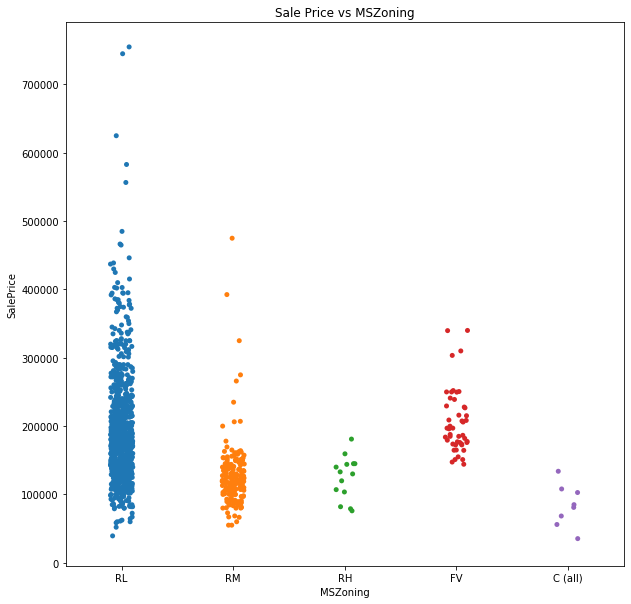

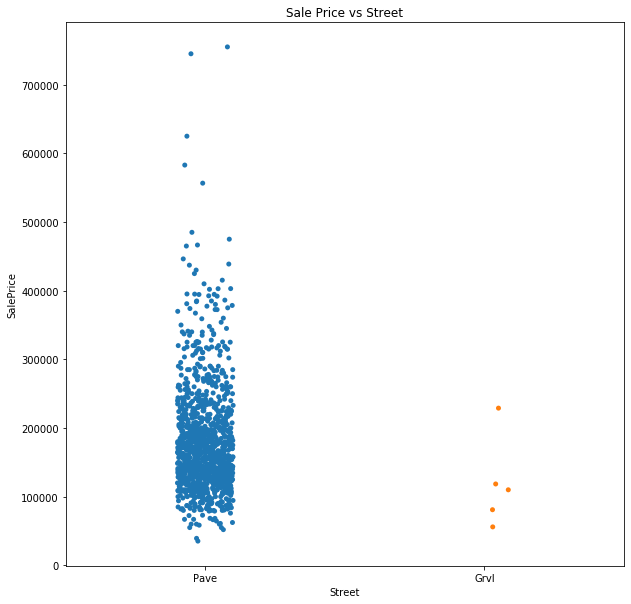

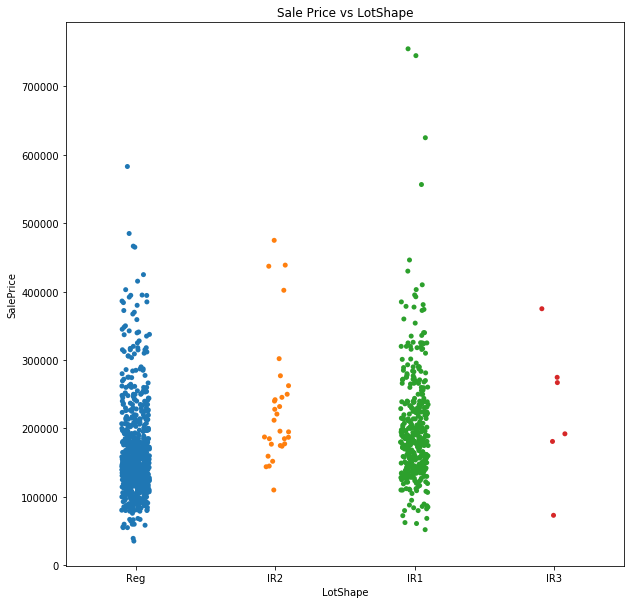

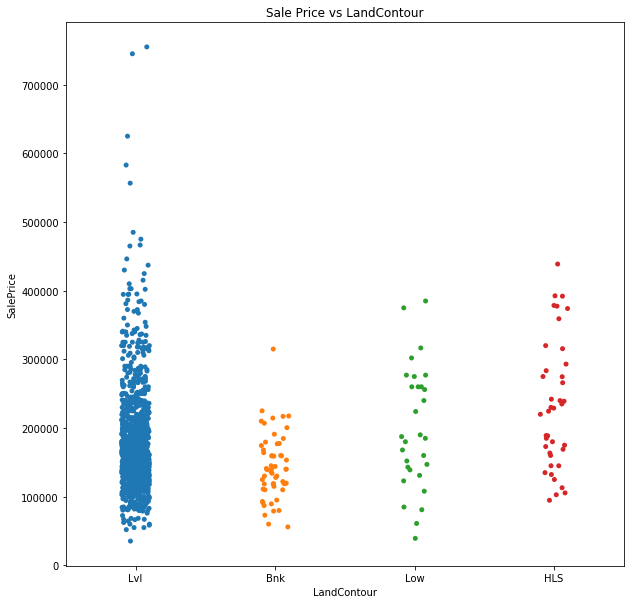

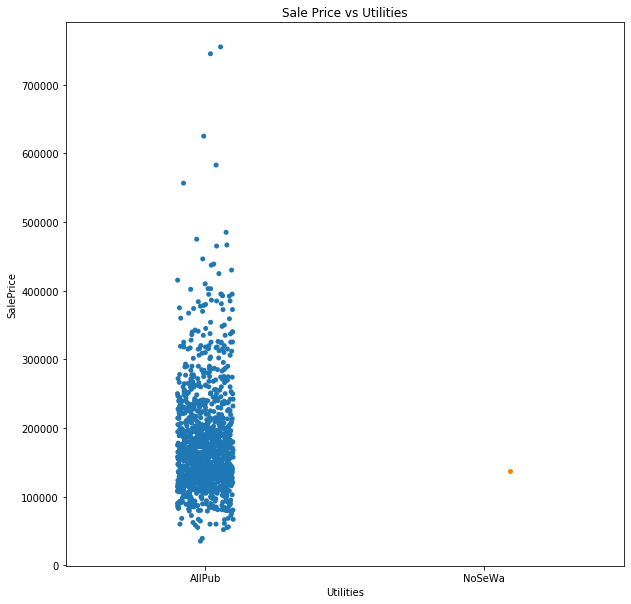

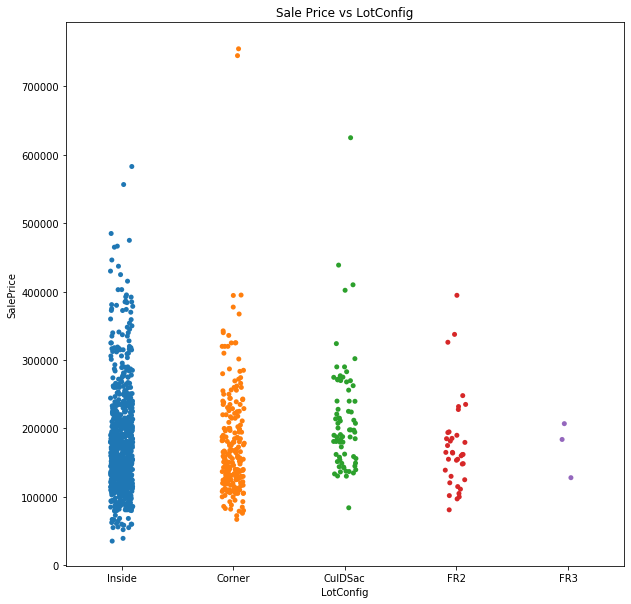

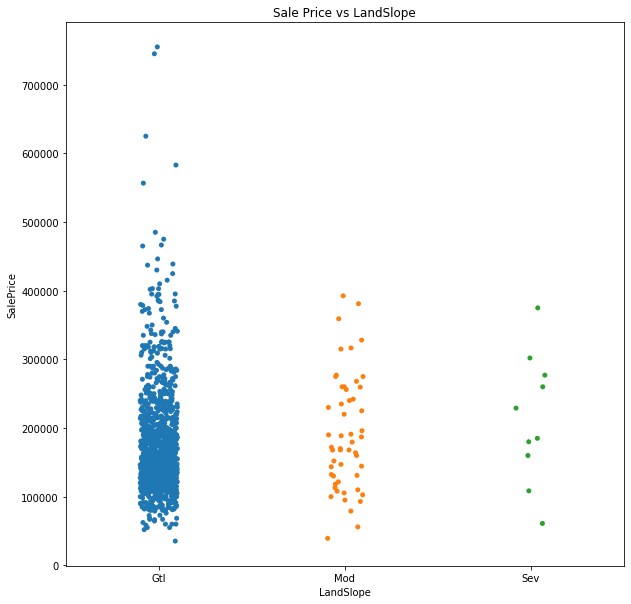

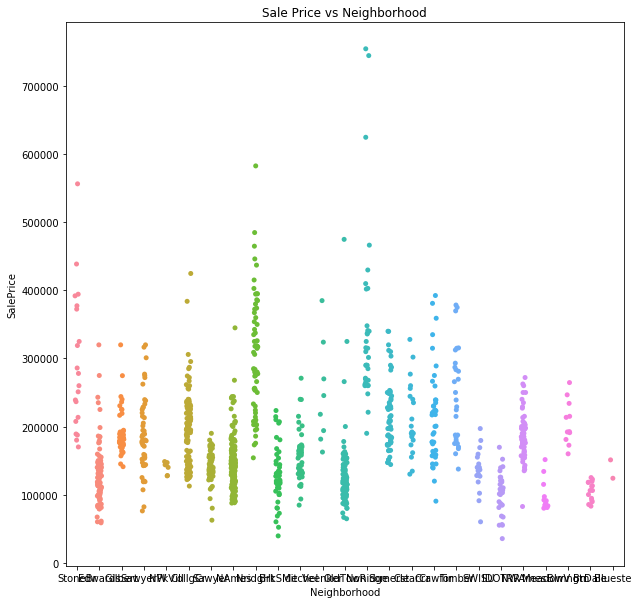

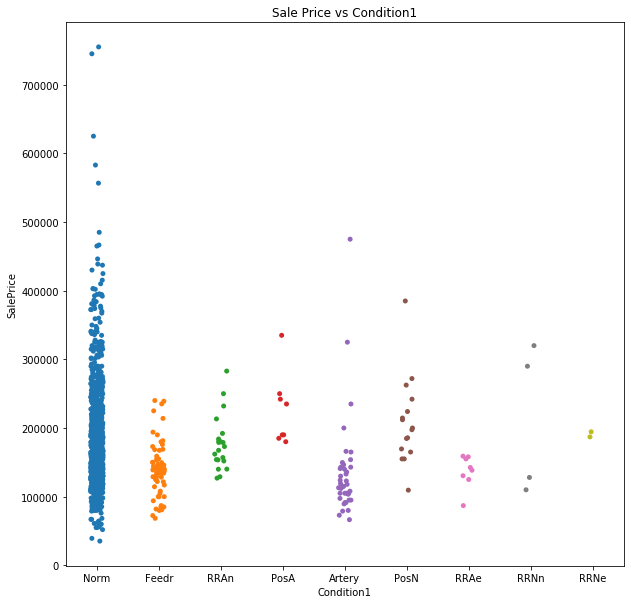

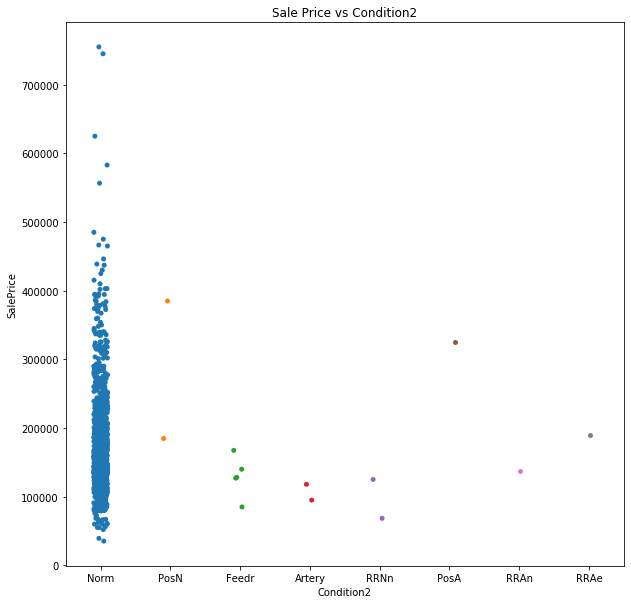

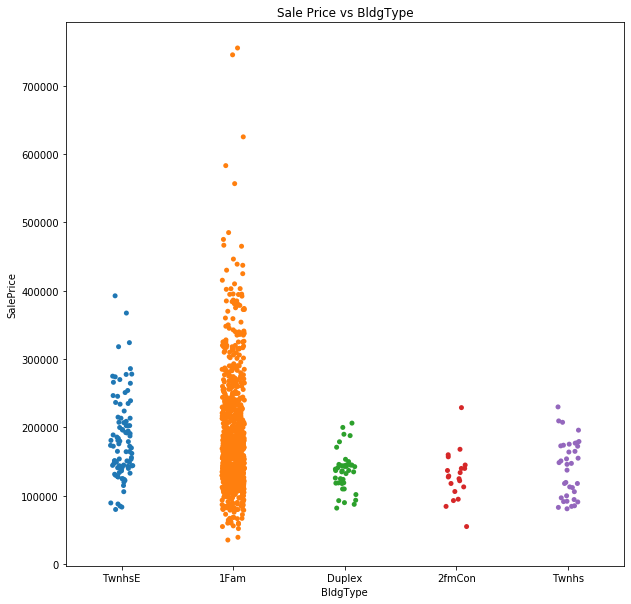

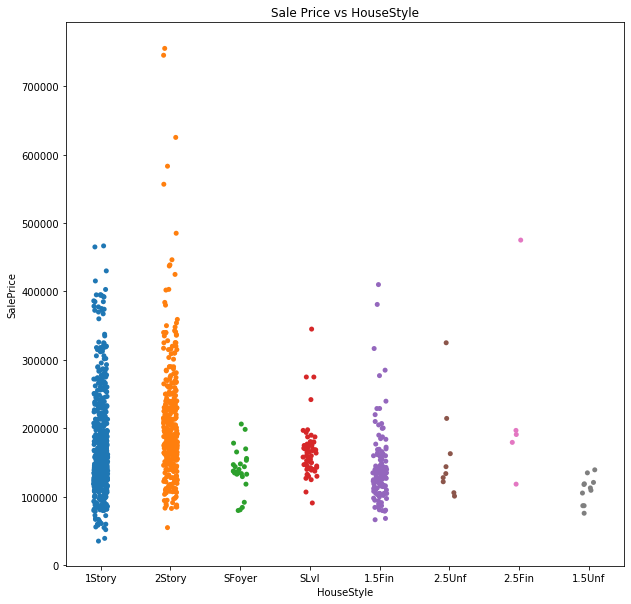

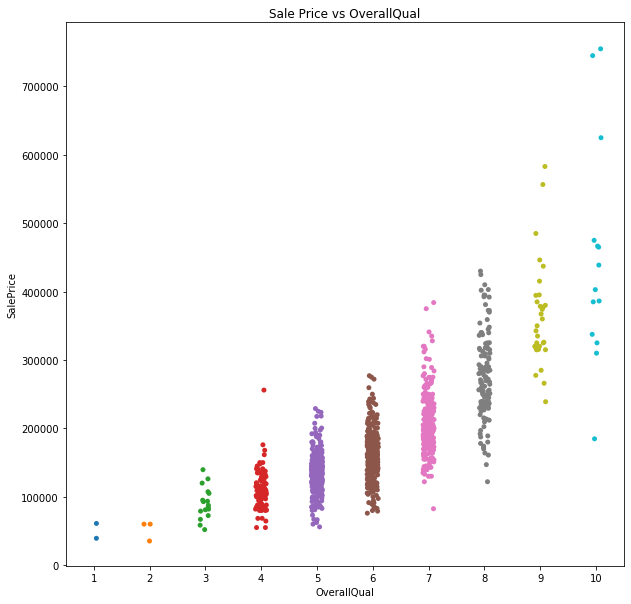

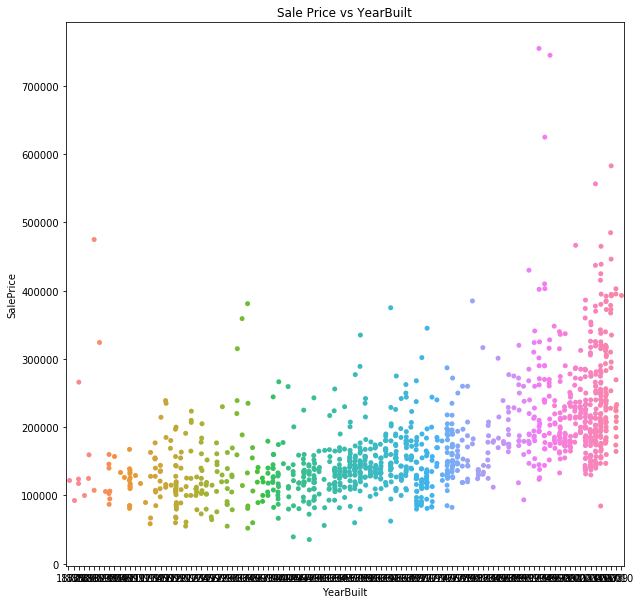

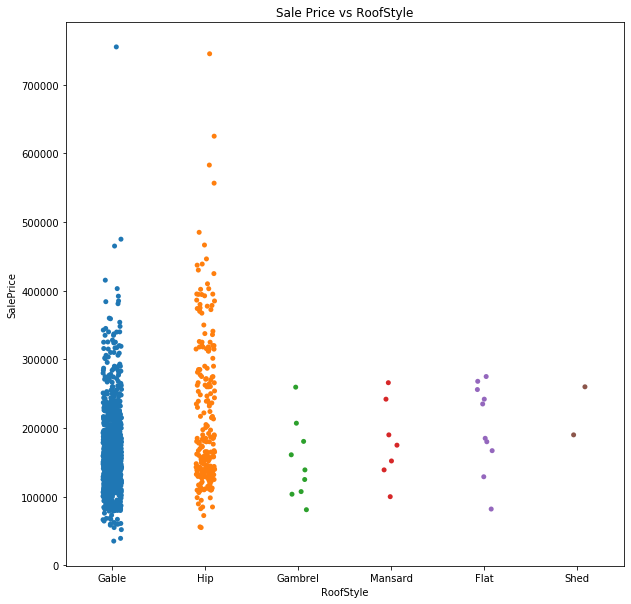

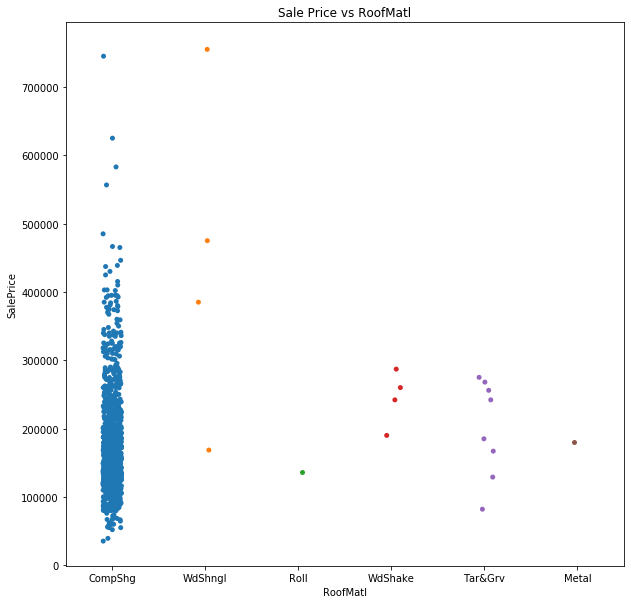

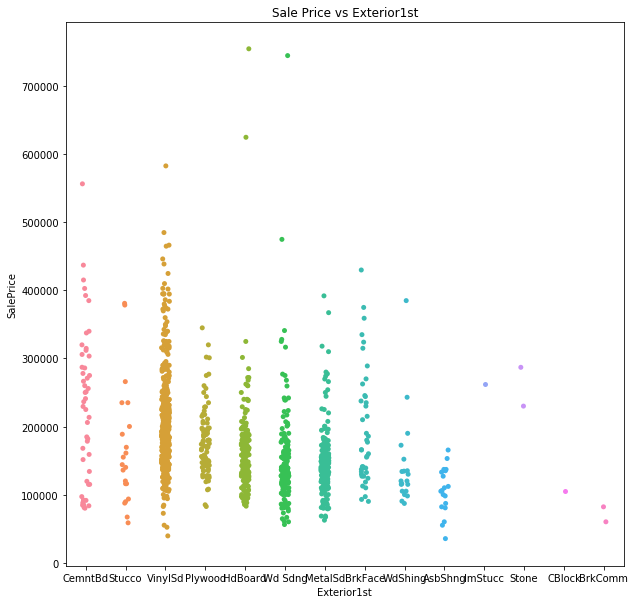

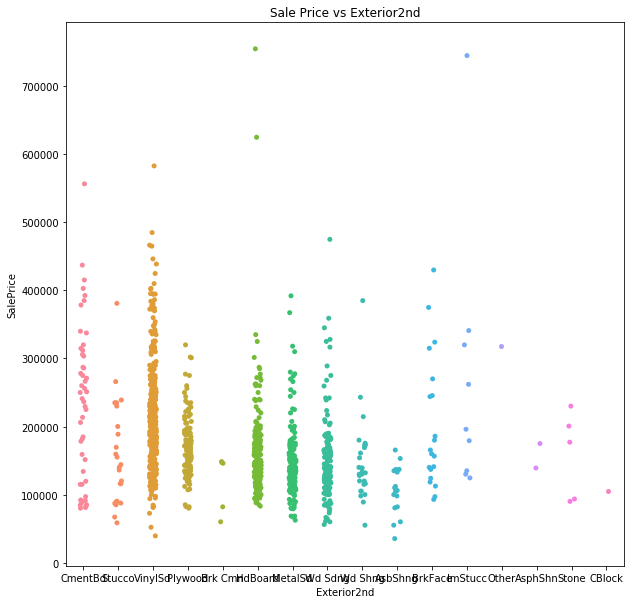

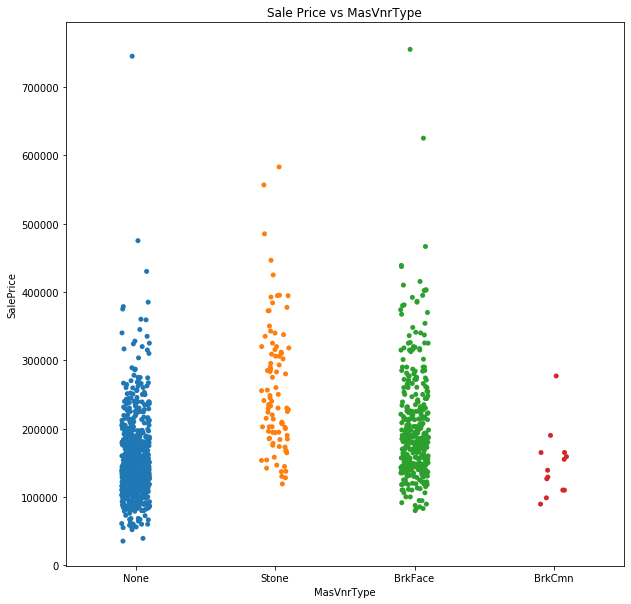

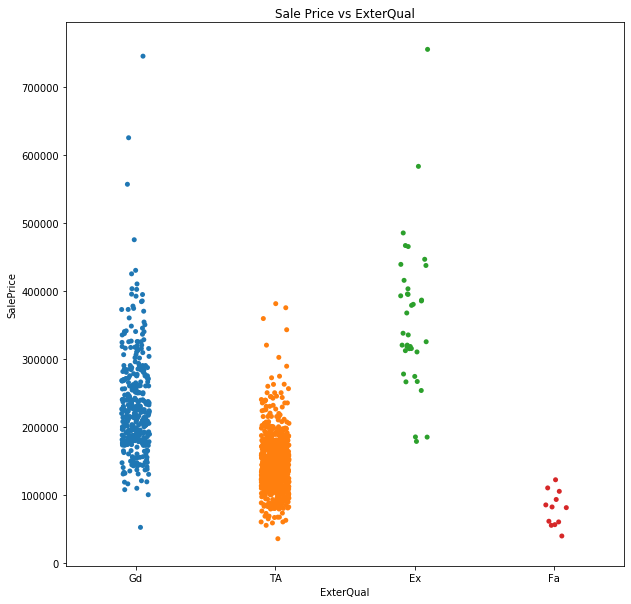

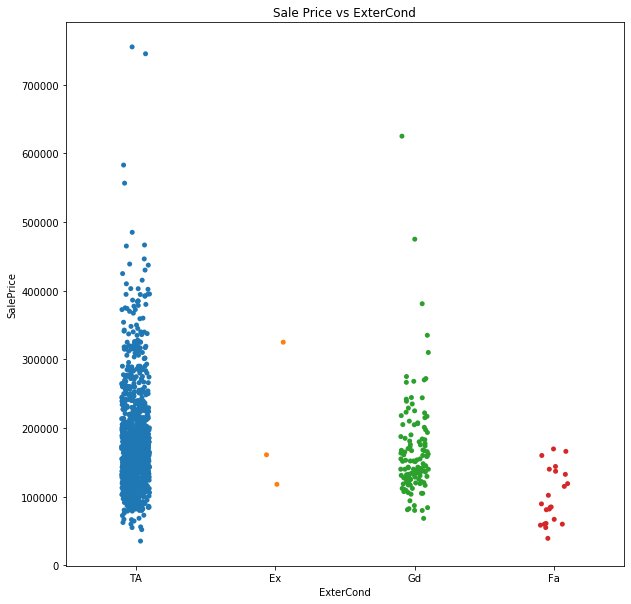

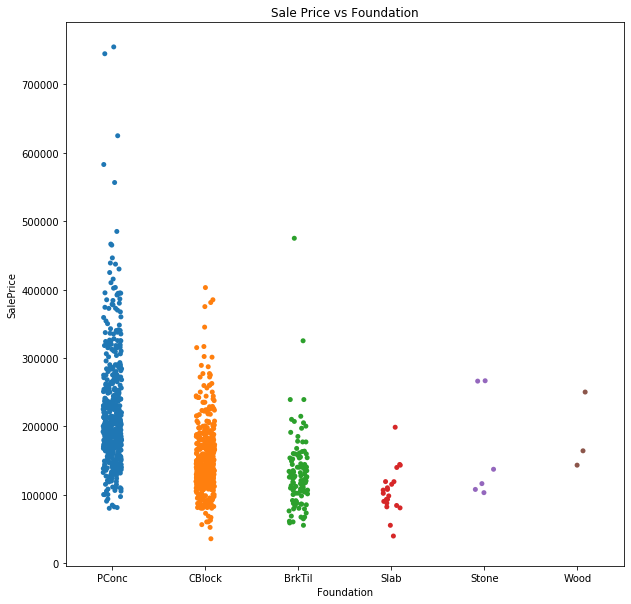

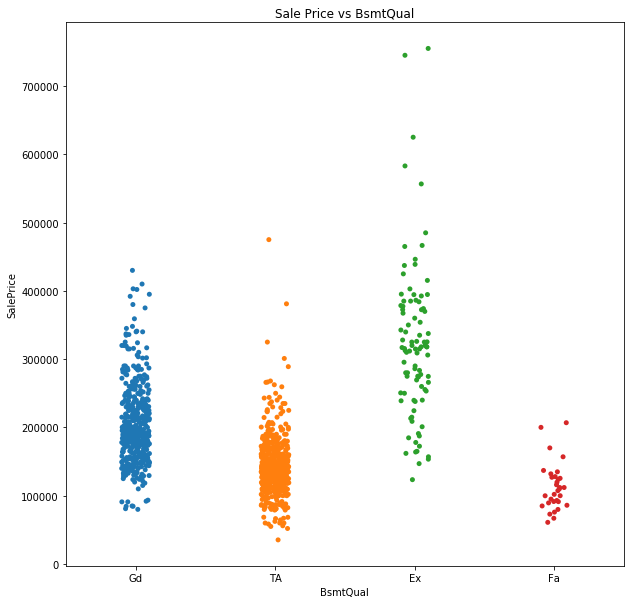

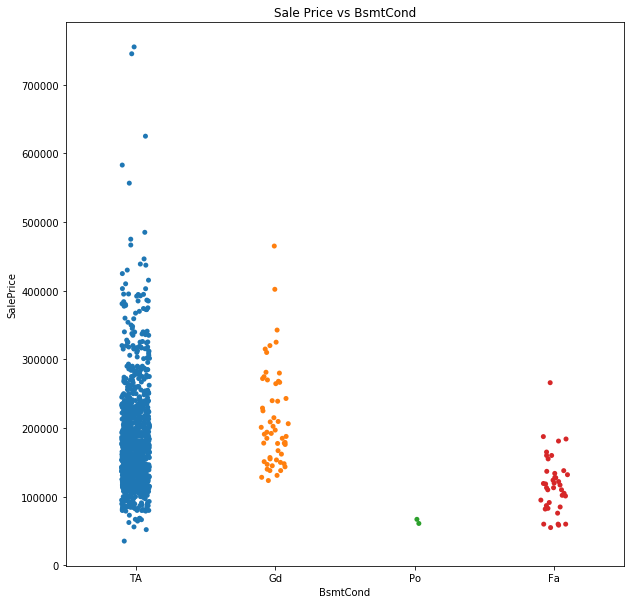

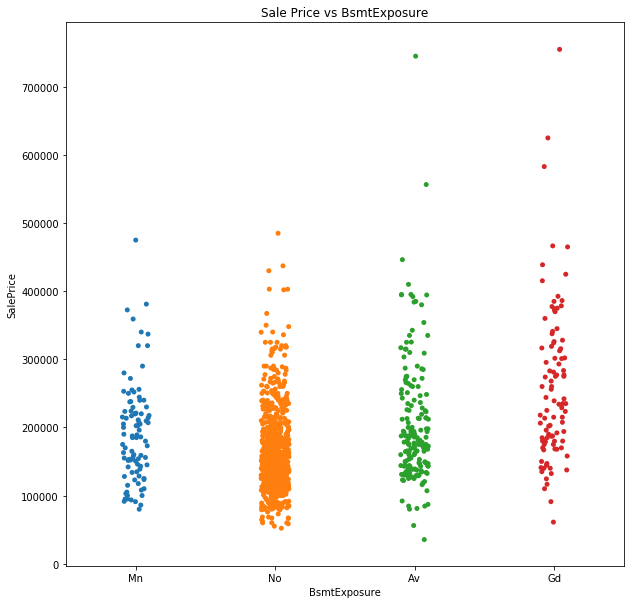

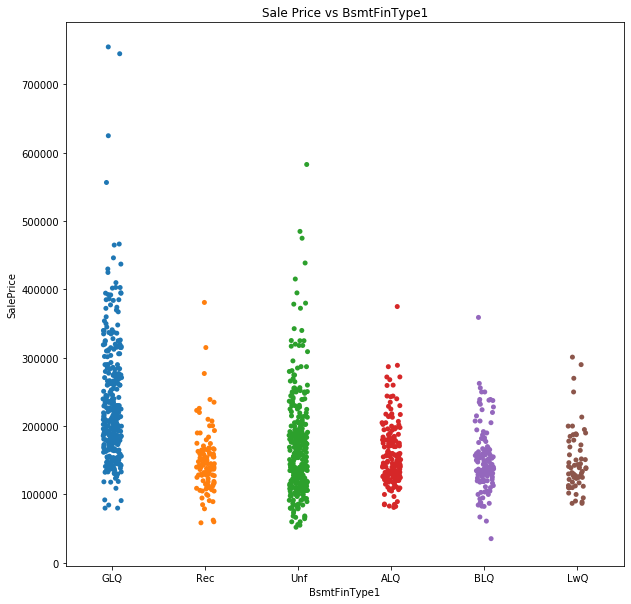

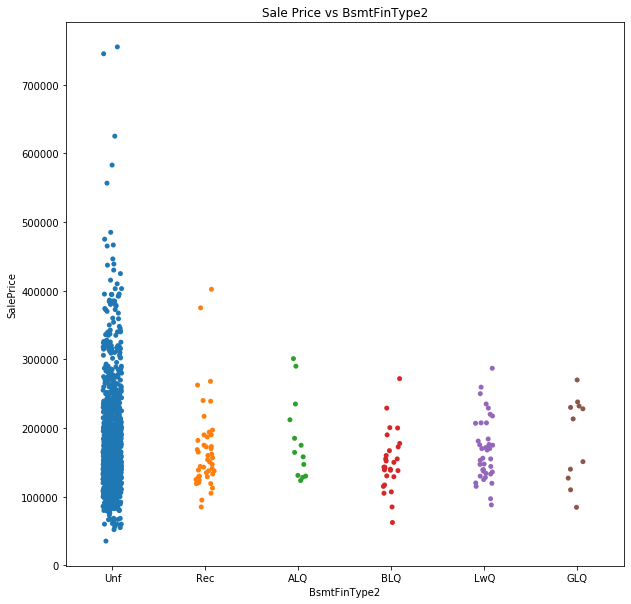

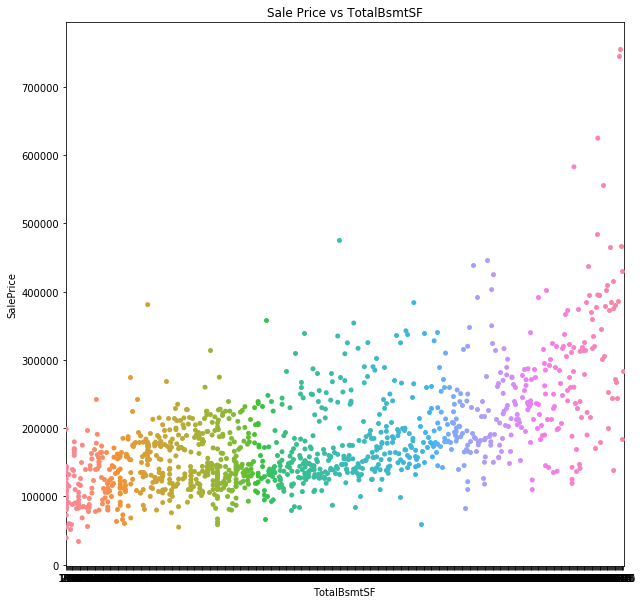

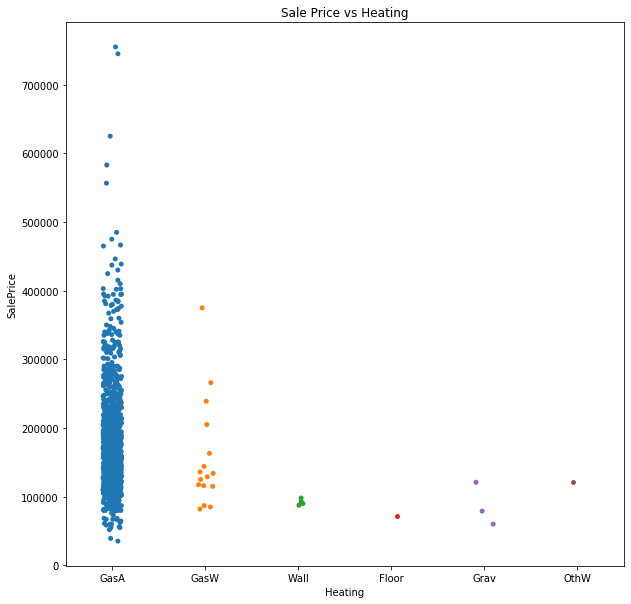

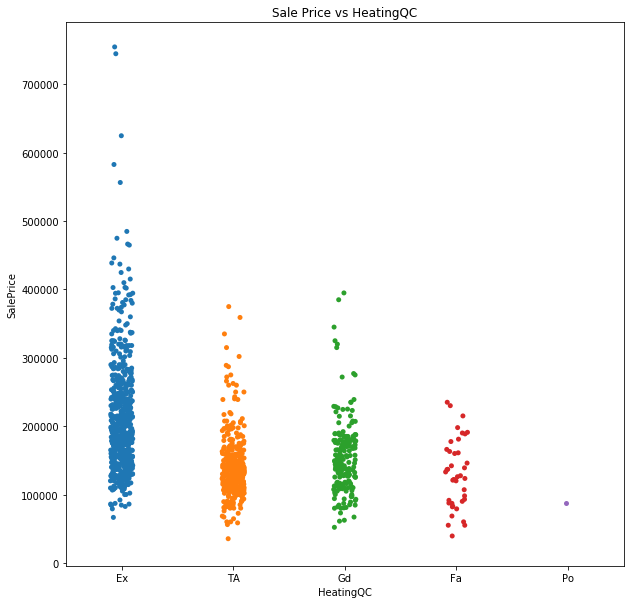

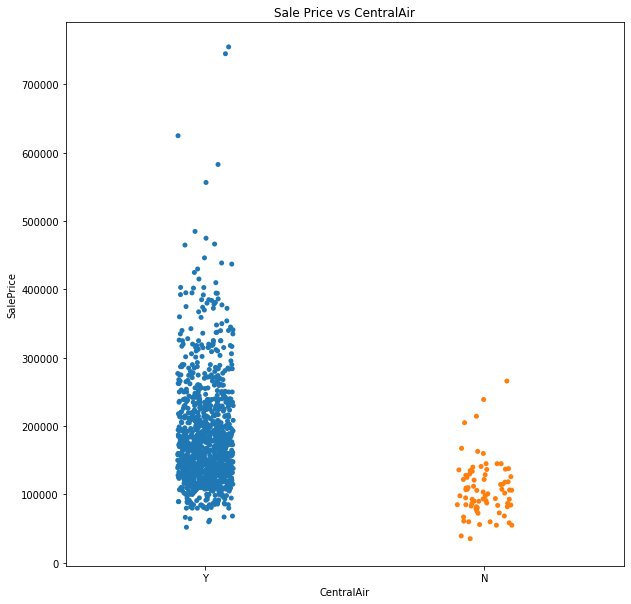

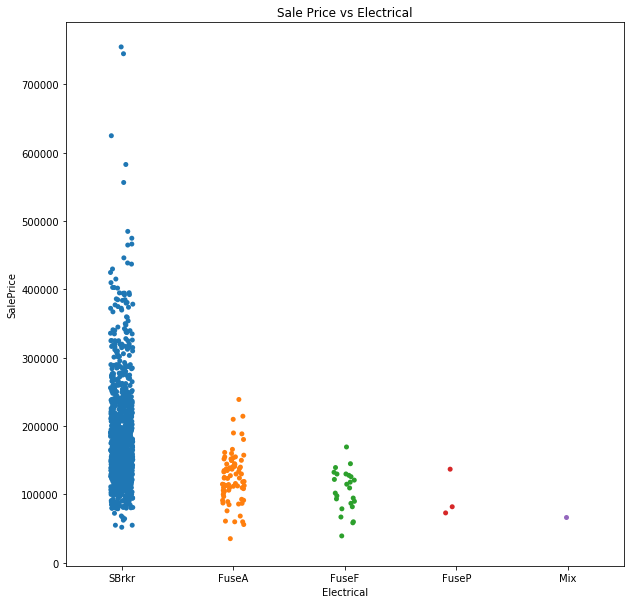

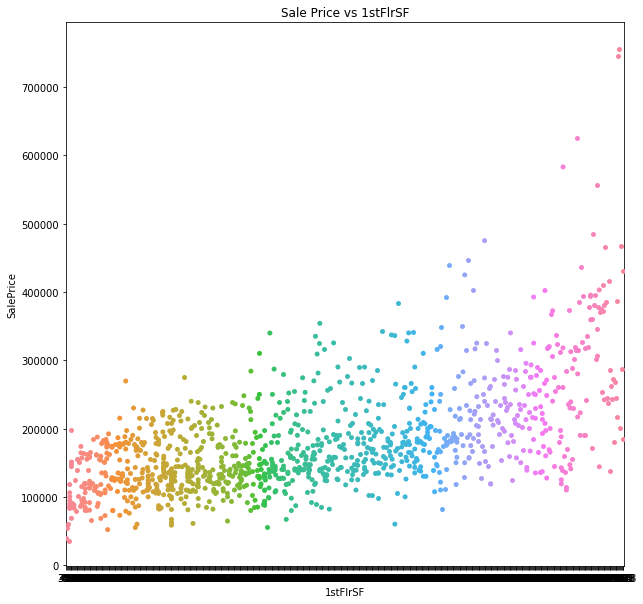

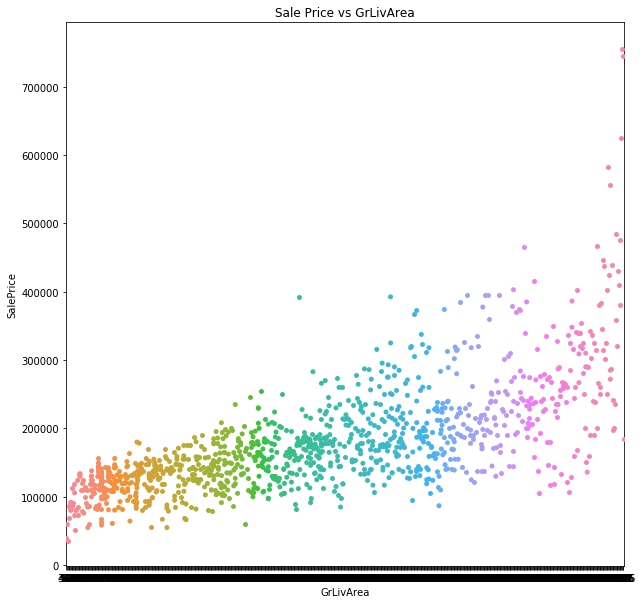

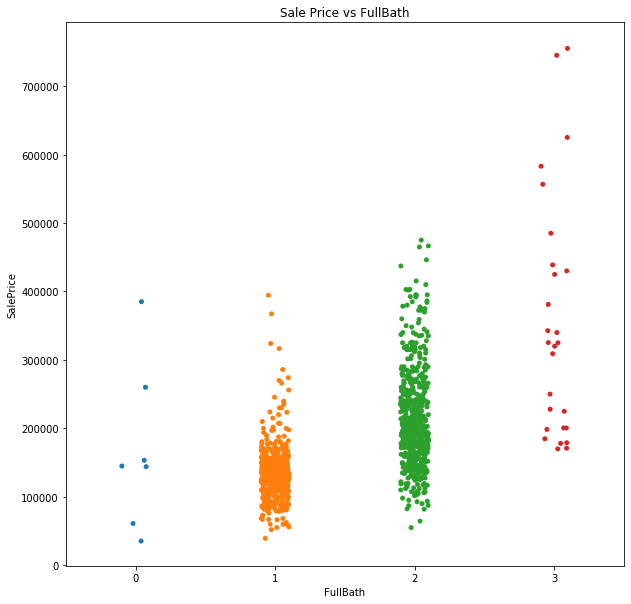

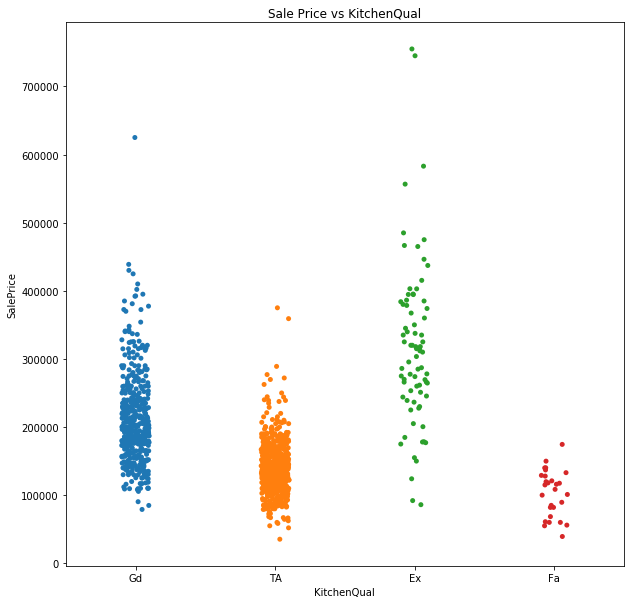

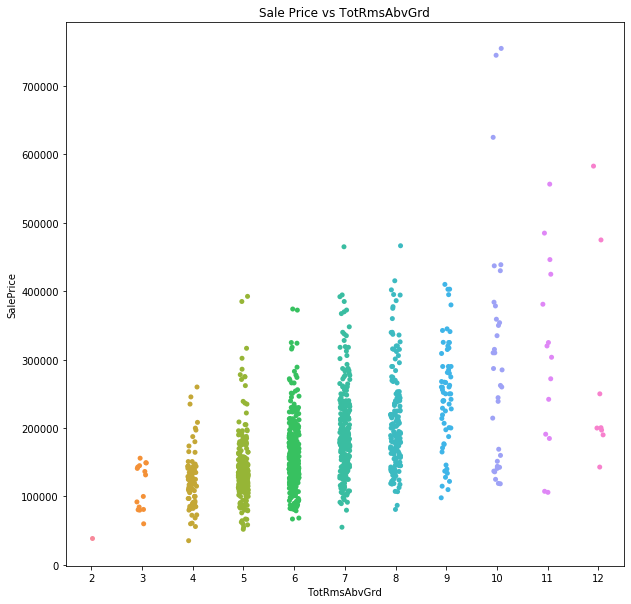

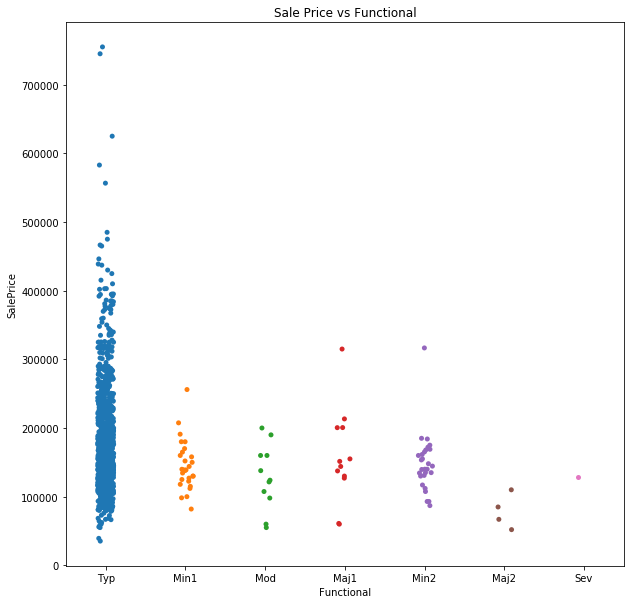

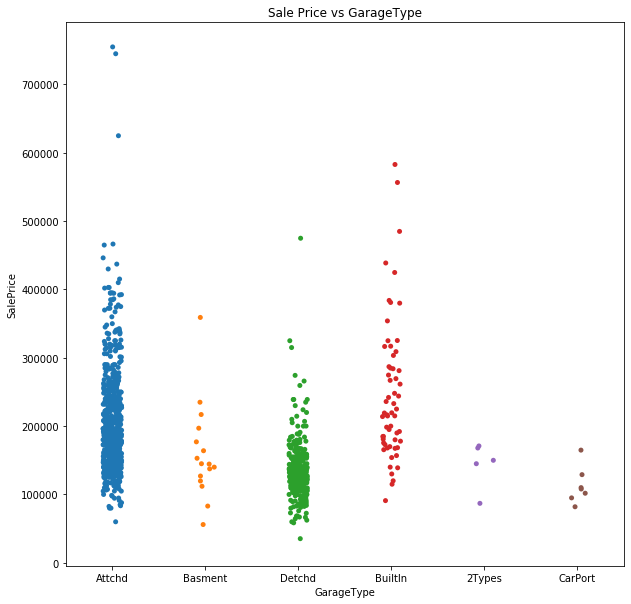

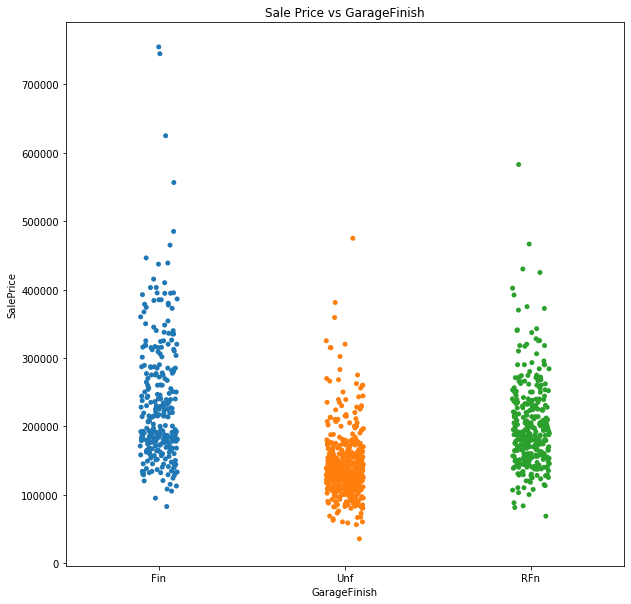

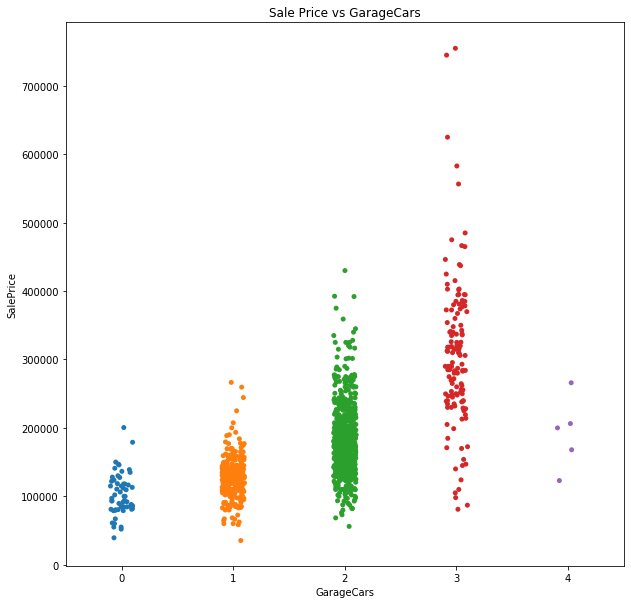

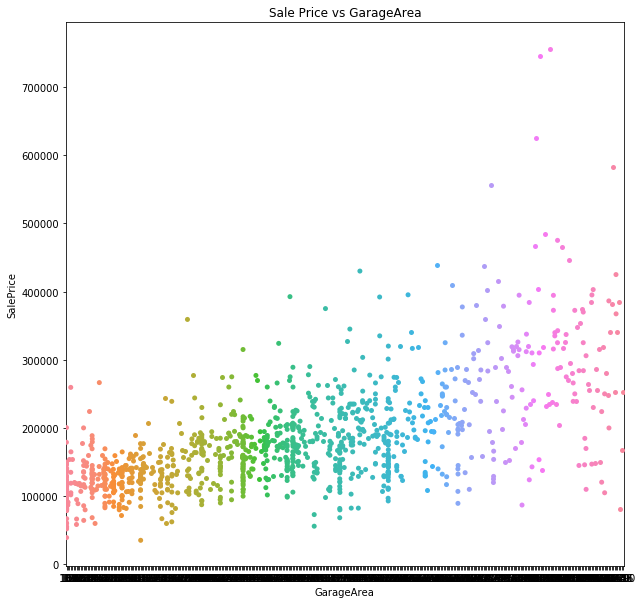

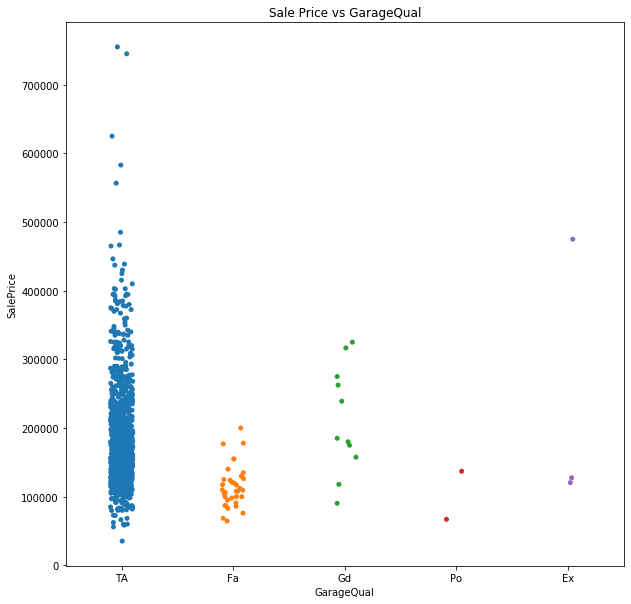

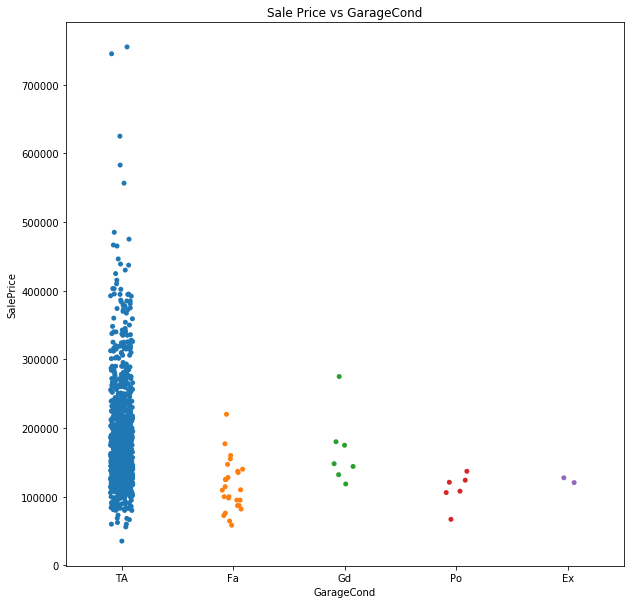

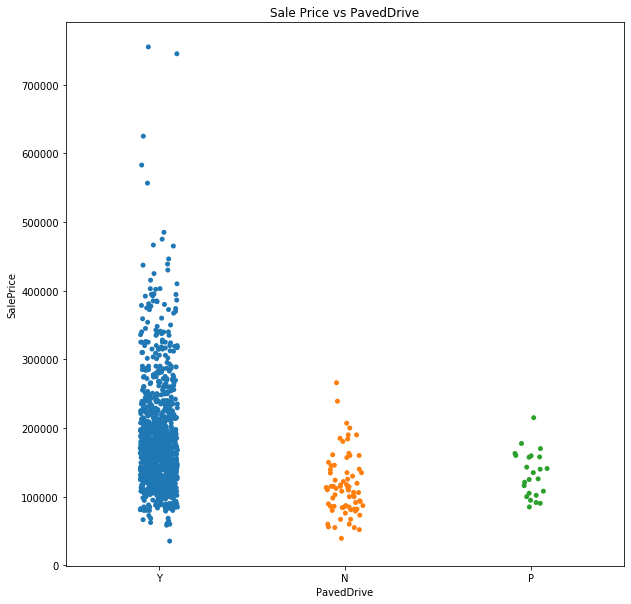

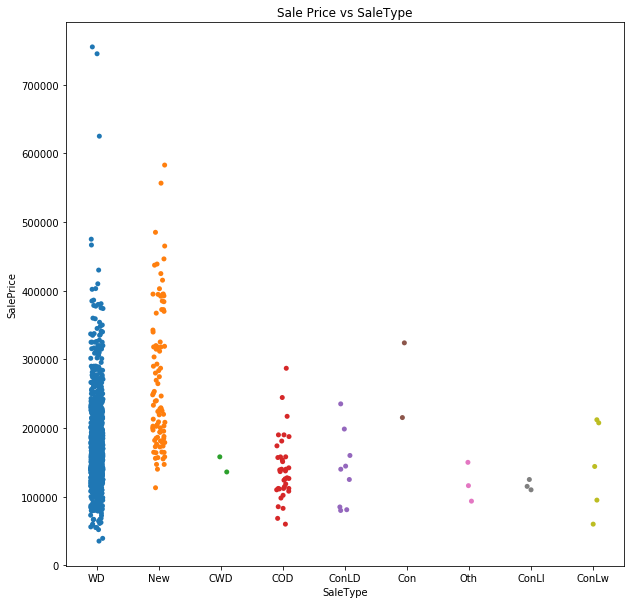

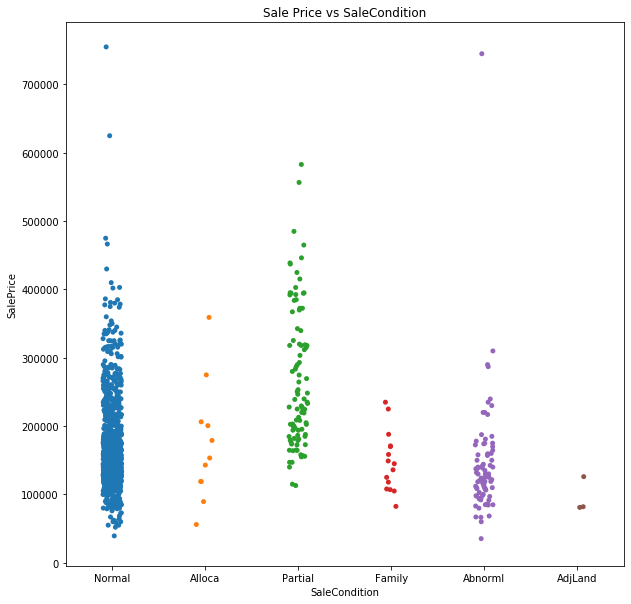

In [17]:
# Scatter Plots for all features vs target

for feature in train.columns:
    if feature != 'SalePrice':
        plt.figure(figsize = (10, 10))
        sns.stripplot(x = feature, y = 'SalePrice', hue = None, data = train)
        plt.title(f'Sale Price vs {feature}')
        plt.show()

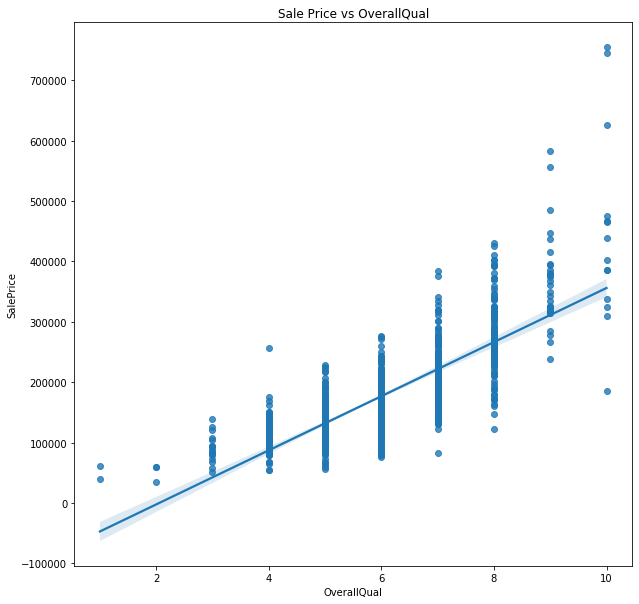

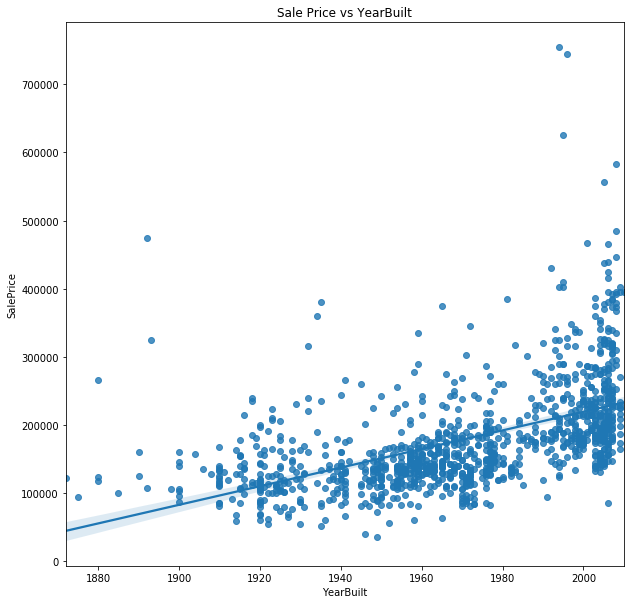

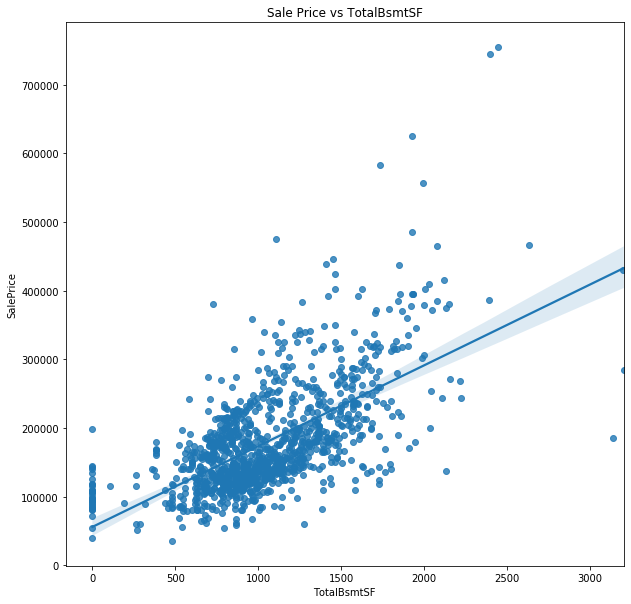

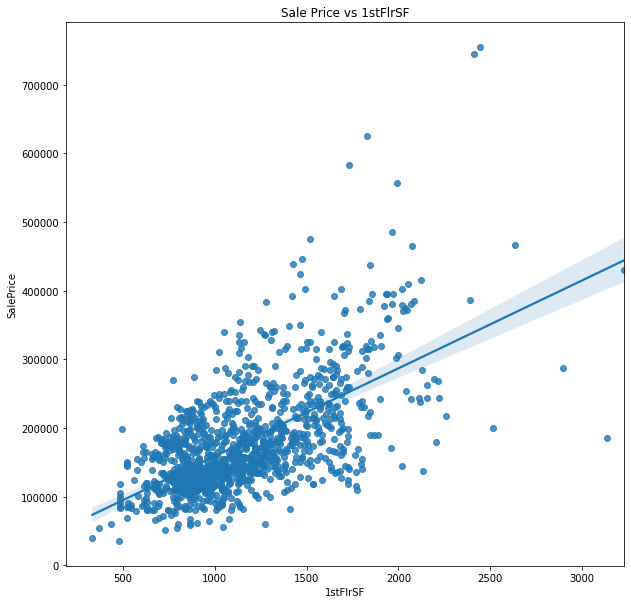

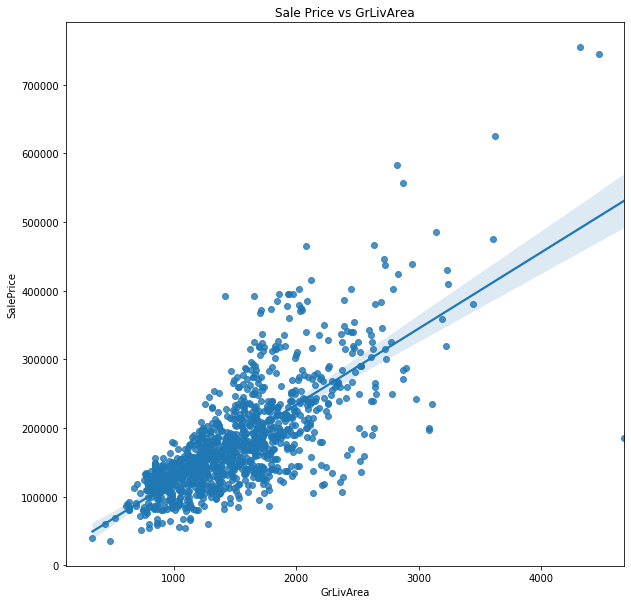

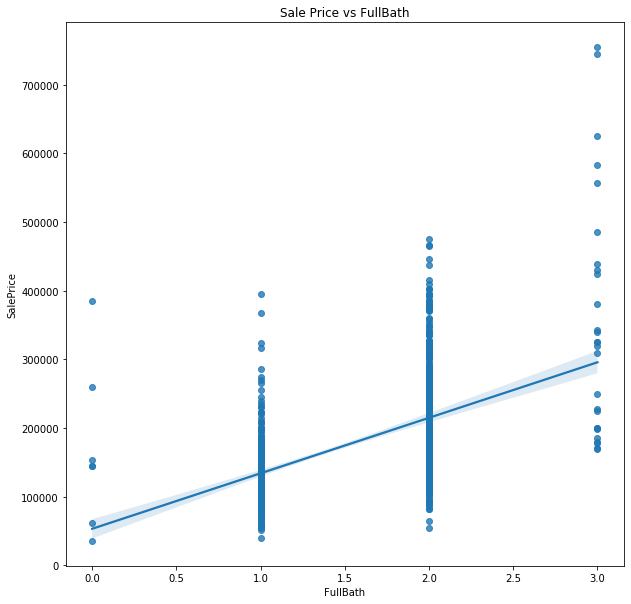

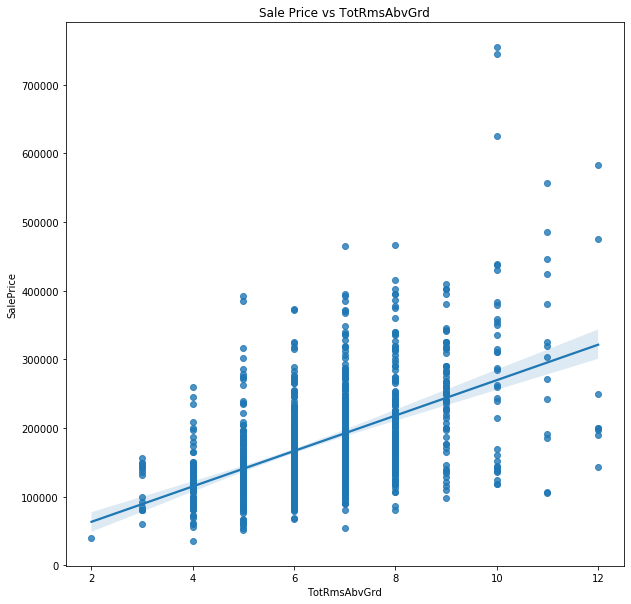

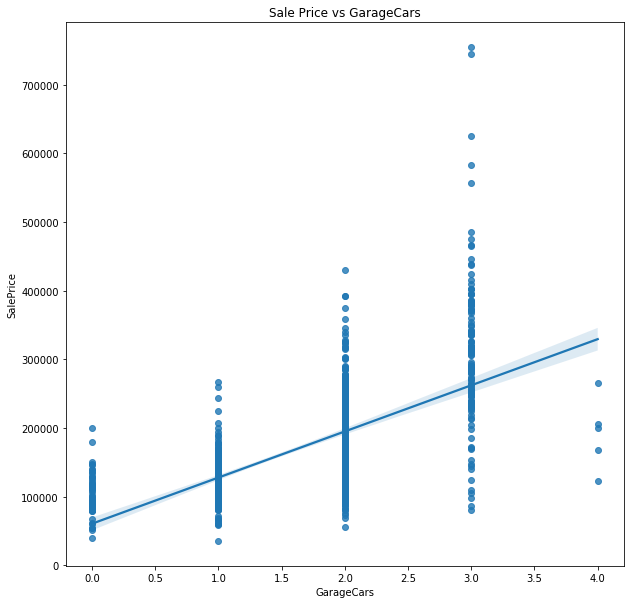

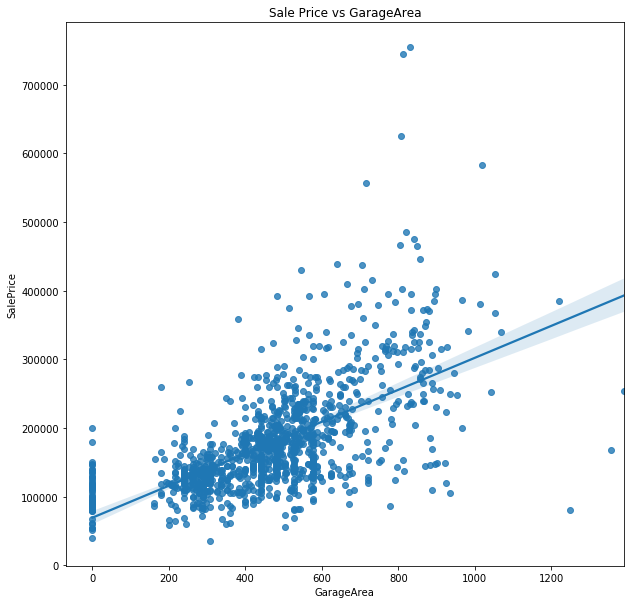

In [18]:
# Let's try to do regression only for numerical features vs target

count = 0

for feature in train.columns:
    if is_numeric_dtype(train[feature]) and feature != 'SalePrice':
        count += 1
        plt.figure(figsize = (10, 10))
        plt.title(f'Sale Price vs {feature}')
        sns.regplot(x = feature, y = 'SalePrice', data = train)
        plt.show()

# Preprocessing the Data

In [3]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1060,1061,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616,Unf,0,722,1338,GasA,Ex,Y,SBrkr,1338,0,0,1338,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2,582,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
1168,1169,70,RL,120.0,13728,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,1935,1986,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626,Unf,0,501,1127,GasA,Ex,Y,SBrkr,1236,872,0,2108,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,1935.0,Unf,2,540,TA,TA,Y,0,0,0,0,90,0,NaN,NaN,NaN,0,7,2008,WD,Normal,235000
909,910,60,RL,149.0,12589,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,742,742,GasA,Ex,Y,SBrkr,742,742,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,2,390,TA,TA,Y,36,24,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
504,505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,6,5,1974,1974,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,257,Rec,495,103,855,GasA,TA,Y,SBrkr,855,467,0,1322,0,1,2,1,3,1,TA,6,Typ,1,Fa,Attchd,1974.0,Unf,2,440,TA,TA,Y,260,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,673.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1163,Unf,0,89,1252,GasA,Ex,Y,SBrkr,1268,1097,0,2365,1,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337000
924,925,20,RL,79.0,10240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,157.0,TA,Gd,CBlock,Gd,TA,No,BLQ,625,LwQ,1061,0,1686,GasA,TA,Y,SBrkr,1686,0,0,1686,1,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1980.0,Unf,2,612,TA,TA,Y,384,131,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,207500
111,112,80,RL,NaN,7750,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,250,Unf,0,134,384,GasA,Ex,Y,SBrkr,774,656,0,1430,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,2000.0,Fin,2,400,TA,TA,Y,180,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180000
969,970,190,RL,75.0,10382,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,6,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,BrkFace,105.0,TA,Fa,CBlock,TA,TA,Gd,ALQ

In [4]:
display(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,959.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1110.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,734.601027,56.434075,70.013556,10512.893836,6.048801,5.583904,1970.578767,1984.471747,102.544828,443.832192,45.522260,556.232021,1045.586473,1156.624144,341.049658,5.963185,1503.636986,0.428082,0.054795,1.554795,0.371575,2.853596,1.047089,6.478596,0.600171,1977.599099,1.760274,470.494863,93.612158,46.035959,22.945205,3.114726,14.384418,3.037671,47.666096,6.333904,2007.813356,178906.225171
std,426.831663,41.397740,23.649644,10550.977176,1.371836,1.129103,29.795860,20.678406,183.986831,430.013779,155.985387,443.769132,419.085933,377.837619,431.665449,49.017523,519.168380,0.520331,0.227676,0.552701,0.497411,0.813324,0.219858,1.606933,0.640185,24.607663,0.735253,207.460951,126.145213,64.574957,62.618761,26.729189,52.937842,42.672869,549.498138,2.688287,1.325161,78041.078211
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,361.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,208.000000,794.000000,868.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,326.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,734.500000,50.000000,70.000000,9434.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,387.500000,0.000000,456.500000,981.000000,1086.000000,0.000000,0.000000,1454.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,475.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1110.250000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2003.000000,157.250000,719.000000,0.000000,793.500000,1277.250000,1375.500000,720.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209050.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,1.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,502.000000,552.000000,407.000000,440.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's see which features are missing a lot of data (15% or more), and drop those.  

We have to drop from valid, train, and test sets. ONLY USE THE INFO FROM THE TRAIN TO MAKE THE DROPS.

In [6]:
train_null = train.isnull()
train_null_sum = train_null[train_null.columns[train_null.sum() > len(train) * .15]].sum()
display(train_null_sum)
print('')
display(train.columns[train.isnull().sum() > len(train) * .15])
print('')
display(train[train.columns[train.isnull().sum() > len(train) * .15]])

LotFrontage     209
Alley          1094
FireplaceQu     562
PoolQC         1162
Fence           942
MiscFeature    1125
dtype: int64

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
1060,41.0,NaN,NaN,NaN,NaN,NaN
1168,120.0,NaN,TA,NaN,NaN,NaN
909,149.0,NaN,Gd,NaN,NaN,NaN
188,64.0,NaN,TA,NaN,NaN,NaN
504,24.0,NaN,Fa,NaN,NaN,NaN
...,...,...,...,...,...,...
763,82.0,NaN,Gd,NaN,NaN,NaN
924,79.0,NaN,TA,NaN,NaN,NaN
111,NaN,NaN,TA,NaN,NaN,NaN
969,75.0,NaN,NaN,NaN,NaN,NaN


All of these features seem peripheral, and not useful to our model, so let's just drop them.

In [7]:
columns_to_drop = train.columns[train.isnull().sum() > len(train) * .15]
display(columns_to_drop)
train.drop(columns_to_drop, inplace = True, axis = 1)
valid.drop(columns_to_drop, inplace = True, axis = 1)
test.drop(columns_to_drop, inplace = True, axis = 1)
display(train)
display(valid)
display(test)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

C:\Users\evant\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1060,1061,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616,Unf,0,722,1338,GasA,Ex,Y,SBrkr,1338,0,0,1338,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2001.0,Fin,2,582,TA,TA,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
1168,1169,70,RL,13728,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,1935,1986,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626,Unf,0,501,1127,GasA,Ex,Y,SBrkr,1236,872,0,2108,0,0,2,0,4,1,Gd,7,Typ,2,Basment,1935.0,Unf,2,540,TA,TA,Y,0,0,0,0,90,0,0,7,2008,WD,Normal,235000
909,910,60,RL,12589,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,742,742,GasA,Ex,Y,SBrkr,742,742,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,2005.0,Fin,2,390,TA,TA,Y,36,24,0,0,0,0,0,6,2009,WD,Normal,174000
188,189,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,0,6,2009,WD,Alloca,153337
504,505,160,RL,2308,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,6,5,1974,1974,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,257,Rec,495,103,855,GasA,TA,Y,SBrkr,855,467,0,1322,0,1,2,1,3,1,TA,6,Typ,1,Attchd,1974.0,Unf,2,440,TA,TA,Y,260,0,0,0,0,0,0,6,2009,WD,Normal,147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,9430,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,673.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1163,Unf,0,89,1252,GasA,Ex,Y,SBrkr,1268,1097,0,2365,1,0,2,1,3,1,Gd,8,Typ,1,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,0,7,2009,WD,Normal,337000
924,925,20,RL,10240,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,157.0,TA,Gd,CBlock,Gd,TA,No,BLQ,625,LwQ,1061,0,1686,GasA,TA,Y,SBrkr,1686,0,0,1686,1,0,2,0,3,1,TA,7,Typ,1,Attchd,1980.0,Unf,2,612,TA,TA,Y,384,131,0,0,0,0,0,5,2006,WD,Normal,207500
111,112,80,RL,7750,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,250,Unf,0,134,384,GasA,Ex,Y,SBrkr,774,656,0,1430,0,0,2,1,3,1,TA,7,Typ,1,BuiltIn,2000.0,Fin,2,400,TA,TA,Y,180,0,0,0,0,0,0,4,2010,WD,Normal,180000
969,970,190,RL,10382,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,6,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,BrkFace,105.0,TA,Fa,CBlock,TA,TA,Gd,ALQ,513,Unf,0,75,588,GasA,TA,Y,SBrkr,1095,0,0,1095,1,0,1,0,2,1,TA,6,Typ,0,Attchd,1958.0,RFn,1,264,TA,TA,Y,0,0,0,0,0,0,0,3,2006,ConLD,Normal,140000


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1057,1058,60,RL,29959,Pave,IR2,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,6,1994,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,595,Unf,0,378,973,GasA,Ex,Y,SBrkr,979,871,0,1850,0,0,2,1,3,1,Gd,7,Typ,1,BuiltIn,1994.0,Fin,2,467,TA,TA,Y,168,98,0,0,0,0,0,1,2009,WD,Normal,248000
1103,1104,20,RL,8910,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655,Unf,0,0,655,GasA,Ex,Y,SBrkr,1194,0,0,1194,0,1,1,0,3,1,TA,6,Typ,1,BuiltIn,1954.0,Fin,2,539,TA,TA,Y,0,0,192,0,0,0,0,7,2006,WD,Normal,159500
359,360,60,RL,12011,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956,Unf,0,130,1086,GasA,Ex,Y,SBrkr,1086,838,0,1924,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,RFn,2,592,TA,TA,Y,208,75,0,0,374,0,0,6,2006,WD,Normal,280000
645,646,20,RL,10530,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282,LwQ,35,664,981,GasA,TA,Y,SBrkr,981,0,0,981,1,0,1,1,3,1,TA,5,Typ,0,Detchd,1979.0,Unf,2,576,TA,TA,Y,0,312,40,0,0,0,0,3,2007,WD,Normal,143250
1416,1417,190,RM,11340,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,0,4,2010,WD,Normal,122500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,934,20,RL,8487,Pave,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,210.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,1480,1500,GasA,Ex,Y,SBrkr,1500,0,0,1500,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2004.0,RFn,2,570,TA,TA,Y,192,36,0,0,0,0,0,8,2009,WD,Normal,190000
860,861,50,RL,7642,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr,912,514,0,1426,0,0,1,1,3,1,Gd,7,Typ,1,Detchd,1925.0,Unf,1,216,TA,TA,Y,0,240,0,0,0,0,0,6,2007,WD,Normal,189950
73,74,20,RL,10200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1954,2003,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,104.0,TA,TA,CBlock,TA,TA,No,ALQ,320,BLQ,362,404,1086,GasA,Gd,Y,SBrkr,1086,0,0,1086,1,0,1,0,3,1,TA,6,Typ,0,Attchd,1989.0,Unf,2,490,TA,TA,Y,0,0,0,0,0,0,0,5,2010,WD,Normal,144900
753,754,60,RL,10240,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,178.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1030,1030,GasA,Gd,Y,SBrkr,1038,1060,0,2098,0,0,2,1,3,1,Ex,8,Typ,1,Attchd,2005.0,RFn,3,878,TA,TA,Y,192,52,0,0,0,0,0,3,2006,WD,Normal,275500


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


## Numerical Features

Let's consider the correlation coefiicients for each pair of Numerical Features

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.001607,-0.042386,-0.016246,0.005933,0.008268,-0.008745,-0.036760,-0.014824,-0.021606,0.000296,-0.022939,-0.000378,0.008877,-0.038418,0.003478,0.014490,-0.033141,-0.003485,0.000828,0.038639,-0.025321,0.029655,-0.031320,0.020913,0.023657,0.025741,-0.042795,0.011482,-0.014534,-0.036884,-0.010765,0.052803,-0.011149,0.018138,0.000206,-0.004221
MSSubClass,0.001607,1.000000,-0.123502,0.067948,-0.069902,0.068710,0.057412,0.061924,-0.042260,-0.077127,-0.151426,-0.232414,-0.248666,0.298508,0.030893,0.070140,0.022395,0.005748,0.143277,0.203600,-0.059420,0.266073,0.029605,-0.027331,0.107467,-0.008402,-0.075382,0.034235,0.010958,-0.045592,-0.034606,-0.014424,0.010037,-0.002453,0.026993,-0.022999,-0.052271
LotArea,-0.042386,-0.123502,1.000000,0.083994,-0.009336,0.010876,-0.000893,0.085293,0.178582,0.123477,-0.002104,0.226969,0.271803,0.039218,0.008422,0.231215,0.147647,0.064260,0.115506,0.006322,0.123507,-0.019847,0.171100,0.251088,-0.025740,0.143255,0.152200,0.155066,0.070952,-0.013755,0.024422,0.021121,0.037762,0.042043,-0.003070,-0.013228,0.251472
OverallQual,-0.016246,0.067948,0.083994,1.000000,-0.069861,0.557492,0.523342,0.403608,0.225351,-0.061155,0.303249,0.529574,0.466371,0.315092,-0.028913,0.598669,0.100357,-0.046978,0.549679,0.273533,0.118538,-0.183773,0.420090,0.382274,0.532904,0.585056,0.542132,0.221986,0.315070,-0.097507,0.032073,0.076379,0.052547,-0.023509,0.077134,-0.030338,0.787376
OverallCond,0.005933,-0.069902,-0.009336,-0.069861,1.000000,-0.348329,0.093120,-0.122973,-0.039550,0.009156,-0.130278,-0.175124,-0.144334,0.024514,0.019278,-0.082841,-0.065564,0.135434,-0.185878,-0.058610,0.002657,-0.103952,-0.064420,-0.031198,-0.314808,-0.172899,-0.136128,0.013106,-0.037215,0.051489,0.038096,0.040224,0.002068,0.073105,0.002054,0.043692,-0.068442
YearBuilt,0.008268,0.068710,0.010876,0.557492,-0.348329,1.000000,0.579310,0.310506,0.257451,-0.040611,0.140244,0.397553,0.279419,0.019800,-0.183726,0.202470,0.185301,-0.055205,0.466478,0.238601,-0.044661,-0.166495,0.090942,0.130334,0.824168,0.516038,0.455920,0.212143,0.219387,-0.376942,0.025182,-0.024869,-0.004329,-0.026242,0.002089,-0.011130,0.521671
YearRemodAdd,-0.008745,0.057412,-0.000893,0.523342,0.093120,0.579310,1.000000,0.168527,0.128442,-0.082173,0.167490,0.278561,0.233371,0.132099,-0.049659,0.274988,0.114533,-0.009499,0.421913,0.168891,-0.040472,-0.146629,0.168299,0.082615,0.629673,0.398981,0.352626,0.183393,0.241237,-0.186283,0.037310,-0.004844,-0.002575,0.004884,0.036564,0.036207,0.489494
MasVnrArea,-0.036760,0.061924,0.085293,0.403608,-0.122973,0.310506,0.168527,1.000000,0.236605,-0.063697,0.113560,0.339439,0.320606,0.190019,-0.068099,0.383411,0.072894,0.007127,0.281196,0.206792,0.121479,-0.026371,0.263657,0.230453,0.252304,0.359810,0.362088,0.150549,0.129131,-0.106023,0.025756,0.069044,-0.022362,-0.025708,-0.008954,-0.020516,0.469569
BsmtFinSF1,-0.014824,-0.042260,0.178582,0.225351,-0.039550,0.257451,0.128442,0.236605,1.000000,-0.053079,-0.515710,0.460236,0.386229,-0.131774,-0.061980,0.165672,0.659041,0.051900,0.058915,-0.000946,-0.102185,-0.072589,0.003145,0.232071,0.155293,0.222314,0.268575,0.225324,0.082369,-0.112049,0.055864,0.047938,0.058806,0.004031,-0.015021,0.011112,0.386292
BsmtFinSF2,-0.021606,-0.077127,0.123477,-0.061155,0.009156,-0.040611,-0.082173,-0.063697,-0.053079,1.000000,-0.192124,0.114302,0.109995,-0.073785,0.027973,0.021343,0.143286,0.107071,-0.053875,-0.016838,0.016152,-0.046168,-0.009722,0.062907,-0.086078,-0.026074,-0.006943,0.086634,0.032599,0.020839,-0.028948,0.097480,0.054120,0.008783,-0.006048,-0.002994,-0.011048


Id              1.000000
PoolArea        0.052803
BedroomAbvGr    0.038639
TotRmsAbvGrd    0.029655
GarageArea      0.025741
Name: Id, dtype: float64

MSSubClass      1.000000
2ndFlrSF        0.298508
KitchenAbvGr    0.266073
HalfBath        0.203600
FullBath        0.143277
Name: MSSubClass, dtype: float64

LotArea       1.000000
1stFlrSF      0.271803
SalePrice     0.251472
Fireplaces    0.251088
GrLivArea     0.231215
Name: LotArea, dtype: float64

OverallQual    1.000000
SalePrice      0.787376
GrLivArea      0.598669
GarageCars     0.585056
YearBuilt      0.557492
Name: OverallQual, dtype: float64

OverallCond      1.000000
BsmtHalfBath     0.135434
YearRemodAdd     0.093120
MiscVal          0.073105
EnclosedPorch    0.051489
Name: OverallCond, dtype: float64

YearBuilt       1.000000
GarageYrBlt     0.824168
YearRemodAdd    0.579310
OverallQual     0.557492
SalePrice       0.521671
Name: YearBuilt, dtype: float64

YearRemodAdd    1.000000
GarageYrBlt     0.629673
YearBuilt       0.579310
OverallQual     0.523342
SalePrice       0.489494
Name: YearRemodAdd, dtype: float64

MasVnrArea     1.000000
SalePrice      0.469569
OverallQual    0.403608
GrLivArea      0.383411
GarageArea     0.362088
Name: MasVnrArea, dtype: float64

BsmtFinSF1      1.000000
BsmtFullBath    0.659041
TotalBsmtSF     0.460236
SalePrice       0.386292
1stFlrSF        0.386229
Name: BsmtFinSF1, dtype: float64

BsmtFinSF2      1.000000
BsmtFullBath    0.143286
LotArea         0.123477
TotalBsmtSF     0.114302
1stFlrSF        0.109995
Name: BsmtFinSF2, dtype: float64

BsmtUnfSF      1.000000
TotalBsmtSF    0.458231
1stFlrSF       0.345668
OverallQual    0.303249
FullBath       0.286913
Name: BsmtUnfSF, dtype: float64

TotalBsmtSF    1.000000
1stFlrSF       0.803268
SalePrice      0.631425
OverallQual    0.529574
GarageArea     0.462361
Name: TotalBsmtSF, dtype: float64

1stFlrSF       1.000000
TotalBsmtSF    0.803268
SalePrice      0.619689
GrLivArea      0.563619
GarageArea     0.468988
Name: 1stFlrSF, dtype: float64

2ndFlrSF        1.000000
GrLivArea       0.694614
HalfBath        0.636568
TotRmsAbvGrd    0.614815
BedroomAbvGr    0.491514
Name: 2ndFlrSF, dtype: float64

LowQualFinSF     1.000000
GrLivArea        0.129971
TotRmsAbvGrd     0.126287
EnclosedPorch    0.078512
PoolArea         0.073553
Name: LowQualFinSF, dtype: float64

GrLivArea       1.000000
TotRmsAbvGrd    0.825432
SalePrice       0.737640
2ndFlrSF        0.694614
FullBath        0.643795
Name: GrLivArea, dtype: float64

BsmtFullBath    1.000000
BsmtFinSF1      0.659041
TotalBsmtSF     0.299567
1stFlrSF        0.234713
SalePrice       0.219525
Name: BsmtFullBath, dtype: float64

BsmtHalfBath    1.000000
OverallCond     0.135434
BsmtFinSF2      0.107071
LotArea         0.064260
WoodDeckSF      0.058384
Name: BsmtHalfBath, dtype: float64

FullBath        1.000000
GrLivArea       0.643795
SalePrice       0.572358
TotRmsAbvGrd    0.569112
OverallQual     0.549679
Name: FullBath, dtype: float64

HalfBath        1.000000
2ndFlrSF        0.636568
GrLivArea       0.435714
TotRmsAbvGrd    0.350872
SalePrice       0.291898
Name: HalfBath, dtype: float64

BedroomAbvGr    1.000000
TotRmsAbvGrd    0.691600
GrLivArea       0.539584
2ndFlrSF        0.491514
FullBath        0.380998
Name: BedroomAbvGr, dtype: float64

KitchenAbvGr    1.000000
MSSubClass      0.266073
TotRmsAbvGrd    0.241760
BedroomAbvGr    0.187141
FullBath        0.144464
Name: KitchenAbvGr, dtype: float64

TotRmsAbvGrd    1.000000
GrLivArea       0.825432
BedroomAbvGr    0.691600
2ndFlrSF        0.614815
FullBath        0.569112
Name: TotRmsAbvGrd, dtype: float64

Fireplaces     1.000000
GrLivArea      0.457071
SalePrice      0.455426
1stFlrSF       0.400486
OverallQual    0.382274
Name: Fireplaces, dtype: float64

GarageYrBlt     1.000000
YearBuilt       0.824168
YearRemodAdd    0.629673
GarageCars      0.568814
GarageArea      0.548294
Name: GarageYrBlt, dtype: float64

GarageCars     1.000000
GarageArea     0.881555
SalePrice      0.633123
OverallQual    0.585056
GarageYrBlt    0.568814
Name: GarageCars, dtype: float64

GarageArea     1.000000
GarageCars     0.881555
SalePrice      0.618676
GarageYrBlt    0.548294
OverallQual    0.542132
Name: GarageArea, dtype: float64

WoodDeckSF     1.000000
SalePrice      0.305615
GrLivArea      0.227521
BsmtFinSF1     0.225324
OverallQual    0.221986
Name: WoodDeckSF, dtype: float64

OpenPorchSF    1.000000
GrLivArea      0.334564
SalePrice      0.330054
OverallQual    0.315070
FullBath       0.293071
Name: OpenPorchSF, dtype: float64

EnclosedPorch    1.000000
LowQualFinSF     0.078512
PoolArea         0.064526
OverallCond      0.051489
2ndFlrSF         0.049108
Name: EnclosedPorch, dtype: float64

3SsnPorch      1.000000
1stFlrSF       0.069925
SalePrice      0.065755
TotalBsmtSF    0.056116
BsmtFinSF1     0.055864
Name: 3SsnPorch, dtype: float64

ScreenPorch    1.000000
Fireplaces     0.169269
SalePrice      0.113225
GrLivArea      0.105200
BsmtFinSF2     0.097480
Name: ScreenPorch, dtype: float64

PoolArea        1.000000
GrLivArea       0.127796
SalePrice       0.115145
2ndFlrSF        0.084515
BedroomAbvGr    0.083017
Name: PoolArea, dtype: float64

MiscVal         1.000000
OverallCond     0.073105
KitchenAbvGr    0.069356
LotArea         0.042043
TotRmsAbvGrd    0.032380
Name: MiscVal, dtype: float64

MoSold          1.000000
GrLivArea       0.077606
OverallQual     0.077134
OpenPorchSF     0.072329
TotRmsAbvGrd    0.051841
Name: MoSold, dtype: float64

YrSold          1.000000
BsmtFullBath    0.048867
OverallCond     0.043692
YearRemodAdd    0.036207
WoodDeckSF      0.021394
Name: YrSold, dtype: float64

SalePrice      1.000000
OverallQual    0.787376
GrLivArea      0.737640
GarageCars     0.633123
TotalBsmtSF    0.631425
Name: SalePrice, dtype: float64

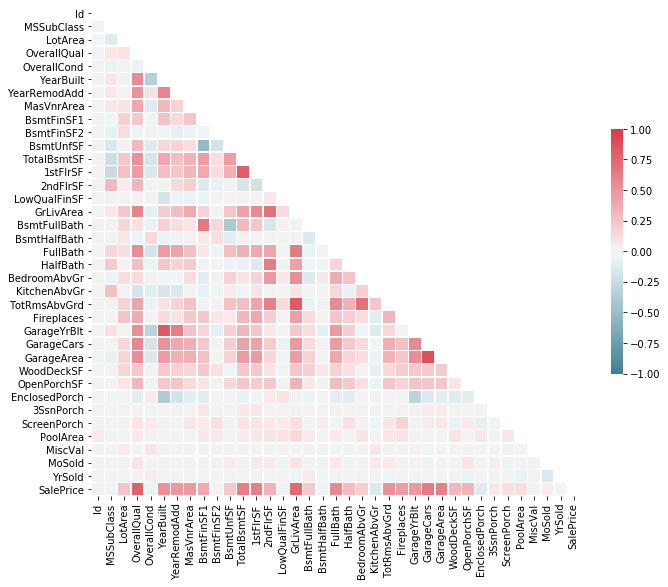

In [8]:
corr = train.corr()
display(corr)

for column in corr:
    display(corr[column].nlargest(5))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Interesting. There's a lot more to consider here, but for now let's just focus on numerical features that are highly correlated with our target value.

In [9]:
display(corr['SalePrice'].sort_values())

KitchenAbvGr    -0.134131
EnclosedPorch   -0.120220
OverallCond     -0.068442
MSSubClass      -0.052271
YrSold          -0.039567
MiscVal         -0.016633
LowQualFinSF    -0.014320
BsmtHalfBath    -0.014142
BsmtFinSF2      -0.011048
Id              -0.004221
MoSold           0.046637
3SsnPorch        0.065755
ScreenPorch      0.113225
PoolArea         0.115145
BedroomAbvGr     0.202488
BsmtFullBath     0.219525
BsmtUnfSF        0.225869
LotArea          0.251472
HalfBath         0.291898
WoodDeckSF       0.305615
OpenPorchSF      0.330054
2ndFlrSF         0.346378
BsmtFinSF1       0.386292
Fireplaces       0.455426
MasVnrArea       0.469569
GarageYrBlt      0.484109
YearRemodAdd     0.489494
YearBuilt        0.521671
TotRmsAbvGrd     0.531046
FullBath         0.572358
GarageArea       0.618676
1stFlrSF         0.619689
TotalBsmtSF      0.631425
GarageCars       0.633123
GrLivArea        0.737640
OverallQual      0.787376
SalePrice        1.000000
Name: SalePrice, dtype: float64

Let's limit our model to just correlation coefficients .5 or above. That will bring us down to 11 numerical features.

In [10]:
corr_sp = corr['SalePrice']
display(corr_sp)

print('')
columns_to_drop2 = corr_sp.loc[corr_sp < .5].index
display(columns_to_drop)

train.drop(columns_to_drop2, inplace = True, axis = 1)
valid.drop(columns_to_drop2, inplace = True, axis = 1)
test.drop(columns_to_drop2, inplace = True, axis = 1)

display(train)
display(valid)
display(test)

Id              -0.004221
MSSubClass      -0.052271
LotArea          0.251472
OverallQual      0.787376
OverallCond     -0.068442
YearBuilt        0.521671
YearRemodAdd     0.489494
MasVnrArea       0.469569
BsmtFinSF1       0.386292
BsmtFinSF2      -0.011048
BsmtUnfSF        0.225869
TotalBsmtSF      0.631425
1stFlrSF         0.619689
2ndFlrSF         0.346378
LowQualFinSF    -0.014320
GrLivArea        0.737640
BsmtFullBath     0.219525
BsmtHalfBath    -0.014142
FullBath         0.572358
HalfBath         0.291898
BedroomAbvGr     0.202488
KitchenAbvGr    -0.134131
TotRmsAbvGrd     0.531046
Fireplaces       0.455426
GarageYrBlt      0.484109
GarageCars       0.633123
GarageArea       0.618676
WoodDeckSF       0.305615
OpenPorchSF      0.330054
EnclosedPorch   -0.120220
3SsnPorch        0.065755
ScreenPorch      0.113225
PoolArea         0.115145
MiscVal         -0.016633
MoSold           0.046637
YrSold          -0.039567
SalePrice        1.000000
Name: SalePrice, dtype: float64

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1060,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,2001,Gable,CompShg,CemntBd,CmentBd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,1338,GasA,Ex,Y,SBrkr,1338,1338,2,Gd,6,Typ,Attchd,Fin,2,582,TA,TA,Y,WD,Normal,213500
1168,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,1935,Hip,CompShg,Stucco,Stucco,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,1127,GasA,Ex,Y,SBrkr,1236,2108,2,Gd,7,Typ,Basment,Unf,2,540,TA,TA,Y,WD,Normal,235000
909,RL,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,2005,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,742,GasA,Ex,Y,SBrkr,742,1484,2,Gd,8,Typ,Attchd,Fin,2,390,TA,TA,Y,WD,Normal,174000
188,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,1979,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,1086,GasA,TA,Y,SBrkr,1224,1224,0,TA,6,Typ,Detchd,Unf,2,528,TA,TA,Y,WD,Alloca,153337
504,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,6,1974,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,TA,TA,No,ALQ,Rec,855,GasA,TA,Y,SBrkr,855,1322,2,TA,6,Typ,Attchd,Unf,2,440,TA,TA,Y,WD,Normal,147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,1252,GasA,Ex,Y,SBrkr,1268,2365,2,Gd,8,Typ,Attchd,RFn,3,856,TA,TA,Y,WD,Normal,337000
924,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,1980,Gable,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,Gd,TA,No,BLQ,LwQ,1686,GasA,TA,Y,SBrkr,1686,1686,2,TA,7,Typ,Attchd,Unf,2,612,TA,TA,Y,WD,Normal,207500
111,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,384,GasA,Ex,Y,SBrkr,774,1430,2,TA,7,Typ,BuiltIn,Fin,2,400,TA,TA,Y,WD,Normal,180000
969,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,6,1958,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,Fa,CBlock,TA,TA,Gd,ALQ,Unf,588,GasA,TA,Y,SBrkr,1095,1095,1,TA,6,Typ,Attchd,RFn,1,264,TA,TA,Y,ConLD,Normal,140000


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1057,RL,Pave,IR2,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,1994,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,973,GasA,Ex,Y,SBrkr,979,1850,2,Gd,7,Typ,BuiltIn,Fin,2,467,TA,TA,Y,WD,Normal,248000
1103,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1959,Hip,CompShg,BrkFace,BrkFace,None,TA,TA,CBlock,TA,TA,Mn,ALQ,Unf,655,GasA,Ex,Y,SBrkr,1194,1194,1,TA,6,Typ,BuiltIn,Fin,2,539,TA,TA,Y,WD,Normal,159500
359,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1086,GasA,Ex,Y,SBrkr,1086,1924,2,Gd,7,Typ,Attchd,RFn,2,592,TA,TA,Y,WD,Normal,280000
645,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1971,Hip,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,981,GasA,TA,Y,SBrkr,981,981,1,TA,5,Typ,Detchd,Unf,2,576,TA,TA,Y,WD,Normal,143250
1416,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,1885,Gable,CompShg,VinylSd,AsbShng,None,TA,TA,PConc,TA,TA,No,Unf,Unf,777,GasA,Gd,Y,SBrkr,1246,2290,2,TA,11,Typ,Detchd,Unf,2,560,TA,TA,N,WD,Normal,122500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1500,GasA,Ex,Y,SBrkr,1500,1500,2,Gd,6,Typ,Attchd,RFn,2,570,TA,TA,Y,WD,Normal,190000
860,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,1918,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,BrkTil,TA,TA,No,Unf,Unf,912,GasA,Gd,Y,SBrkr,912,1426,1,Gd,7,Typ,Detchd,Unf,1,216,TA,TA,Y,WD,Normal,189950
73,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1954,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,BLQ,1086,GasA,Gd,Y,SBrkr,1086,1086,1,TA,6,Typ,Attchd,Unf,2,490,TA,TA,Y,WD,Normal,144900
753,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,1030,GasA,Gd,Y,SBrkr,1038,2098,2,Ex,8,Typ,Attchd,RFn,3,878,TA,TA,Y,WD,Normal,275500


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,882.0,GasA,TA,Y,SBrkr,896,896,1,TA,5,Typ,Attchd,Unf,1.0,730.0,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1329.0,GasA,TA,Y,SBrkr,1329,1329,1,Gd,6,Typ,Attchd,Unf,1.0,312.0,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1997,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,928.0,GasA,Gd,Y,SBrkr,928,1629,2,TA,6,Typ,Attchd,Fin,2.0,482.0,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,926.0,GasA,Ex,Y,SBrkr,926,1604,2,Gd,7,Typ,Attchd,Fin,2.0,470.0,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1280.0,GasA,Ex,Y,SBrkr,1280,1280,2,Gd,5,Typ,Attchd,RFn,2.0,506.0,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,GasA,Gd,Y,SBrkr,546,1092,1,TA,5,Typ,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,546.0,GasA,TA,Y,SBrkr,546,1092,1,TA,6,Typ,CarPort,Unf,1.0,286.0,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,1960,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1224.0,GasA,Ex,Y,SBrkr,1224,1224,1,TA,7,Typ,Detchd,Unf,2.0,576.0,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,1992,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,912.0,GasA,TA,Y,SBrkr,970,970,1,TA,6,Typ,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal


## Categorical Features

Let's look at the Categorical Features and decide what to do with them.

In [11]:
train_cat = train.select_dtypes(exclude = [np.number])
display(train_cat)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1060,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,CemntBd,CmentBd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1168,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,Hip,CompShg,Stucco,Stucco,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Basment,Unf,TA,TA,Y,WD,Normal
909,RL,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
188,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Alloca
504,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
924,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,Gd,TA,No,BLQ,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
111,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal
969,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,Fa,CBlock,TA,TA,Gd,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,ConLD,Normal


One option is to just one-hot everything...  
This may take a while...

In [12]:
#train.apply()

## Dealing with missing values

We have a number of choices for dealing with missing values. We've already dropped features with substantial (>20%) ammount of missig values. For now, we'll take care of the rest by simple imputting with median for numerical and most common for categorical

# Training The Model

Now that we're down to a manageable number of features, let's start training and comparing models.

# Assessing our Results

Now that we've finished training one model from beginning to end, let's test it by uploading our results to Kaggle and see how we did.

# Developing a Pipeline

We went through a lot of steps to prepare our data and train our model. Let's condense as much of that as possible into a single pipeline that we can use for future datasets.

# Developing More Pipelines

This pipeline did ok, but surely we can do better if we tweak some of our steps. Let's develop some more pipelines from beginning to end, and compare the results of each.

# Comparing Models